In [166]:
import pandas as pd

data = pd.read_csv('PSCompPars_2024.10.10_01.06.24.csv', comment='#')

print(data.shape)

(5766, 319)


In [167]:
columns = ['pl_rade', 'pl_bmasse', 'pl_dens', 'pl_orbper', 'pl_orbsmax', 'pl_eqt', 'pl_insol', # characteristics of the planet
           'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_spectype', 'st_age', # characteristics of the host tar
           'sy_snum', 'sy_pnum', 'sy_dist'] # characteristics of the solar system

data_filtered = data[columns]

print(data_filtered.head())

   pl_rade   pl_bmasse  pl_dens   pl_orbper  pl_orbsmax  pl_eqt  pl_insol  \
0     12.2  4914.89849    14.90   323.21000       1.178     NaN       NaN   
1     12.3  4684.81420    13.80   516.21997       1.530     NaN       NaN   
2     13.1  1131.15130     2.76   186.76000       0.775     NaN       NaN   
3     12.6  2559.47216     7.03  1765.03890       2.774     NaN       NaN   
4     13.5   565.73740     1.26   798.50000       1.660     NaN       NaN   

   st_teff  st_rad  st_mass  st_met st_spectype  st_age  sy_snum  sy_pnum  \
0   4874.0   13.76     2.09  -0.260      G8 III     NaN        2        1   
1   4213.0   29.79     2.78  -0.020      K4 III    1.56        1        1   
2   4888.0   11.55     1.78  -0.210      K0 III    4.50        1        1   
3   5338.0    0.93     0.91   0.405        K0 V    3.90        1        2   
4   5750.0    1.13     1.08   0.060        G3 V    7.40        3        1   

    sy_dist  
0   93.1846  
1  125.3210  
2   75.4392  
3   17.9323  
4   

In [168]:
for col in data_filtered.columns:
    print(f'{col}: {data_filtered[col].isnull().sum()}')

pl_rade: 26
pl_bmasse: 28
pl_dens: 110
pl_orbper: 279
pl_orbsmax: 285
pl_eqt: 1486
pl_insol: 1743
st_teff: 254
st_rad: 278
st_mass: 24
st_met: 489
st_spectype: 3712
st_age: 1251
sy_snum: 0
sy_pnum: 0
sy_dist: 44


In [169]:
data_filtered = data_filtered.drop(columns=['pl_insol', 'pl_eqt', 'st_spectype', 'st_age'])

data_filtered = data_filtered.dropna()

print(data_filtered.shape)

(4890, 12)


In [170]:
print(data_filtered.head())

   pl_rade   pl_bmasse  pl_dens   pl_orbper  pl_orbsmax  st_teff  st_rad  \
0     12.2  4914.89849    14.90   323.21000       1.178   4874.0   13.76   
1     12.3  4684.81420    13.80   516.21997       1.530   4213.0   29.79   
2     13.1  1131.15130     2.76   186.76000       0.775   4888.0   11.55   
3     12.6  2559.47216     7.03  1765.03890       2.774   5338.0    0.93   
4     13.5   565.73740     1.26   798.50000       1.660   5750.0    1.13   

   st_mass  st_met  sy_snum  sy_pnum   sy_dist  
0     2.09  -0.260        2        1   93.1846  
1     2.78  -0.020        1        1  125.3210  
2     1.78  -0.210        1        1   75.4392  
3     0.91   0.405        1        2   17.9323  
4     1.08   0.060        3        1   21.1397  


Silhouette Coefficient: 0.14


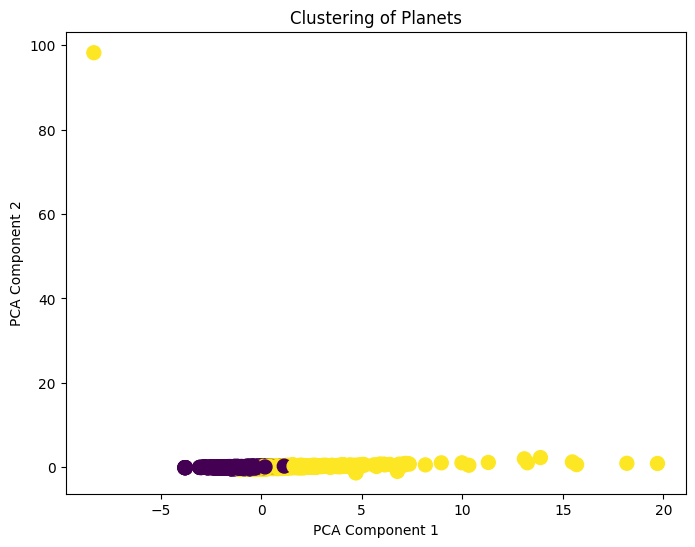

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

kmeans = KMeans(n_clusters=2, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(data_scaled)

silhouette_avg = silhouette_score(data_scaled, data_filtered['cluster'])
print(f'Silhouette Coefficient: {silhouette_avg:.2f}')

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
data_filtered['pca_1'] = pca_components[:, 0]
data_filtered['pca_2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(data_filtered['pca_1'], data_filtered['pca_2'], c=data_filtered['cluster'], cmap='viridis', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Planets')
plt.show()

Deleting the outlier...

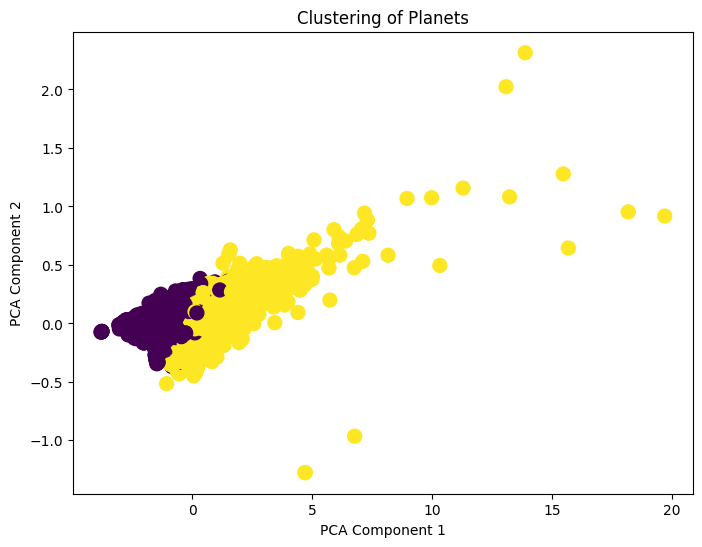

In [172]:
data_filtered = data_filtered[data_filtered['pca_2'] < 20]

plt.figure(figsize=(8,6))
plt.scatter(data_filtered['pca_1'], data_filtered['pca_2'], c=data_filtered['cluster'], cmap='viridis', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Planets')
plt.show()

In [173]:
hwc = pd.read_csv('hwc_table_all.csv')
nasa = pd.read_csv('PSCompPars_2024.10.10_01.06.24.csv', comment='#')

habitables = nasa[nasa['pl_name'].isin(hwc['Name'])]

habitables.to_csv('habitables.csv', index=False)

In [174]:
cluster0 = data_filtered[data_filtered['cluster'] == 0].drop(columns=['pca_1', 'pca_2', 'cluster'])
cluster1 = data_filtered[data_filtered['cluster'] == 1].drop(columns=['pca_1', 'pca_2', 'cluster'])

In [175]:
habitables_filtered = habitables[columns].drop(columns=['pl_insol', 'pl_eqt', 'st_spectype', 'st_age'])

In [176]:
print(cluster0.shape)
print(cluster1.shape)
print(habitables_filtered.shape)

(2168, 12)
(2721, 12)
(70, 12)


In [177]:
from scipy.spatial.distance import euclidean

mean0 = cluster0.mean()
mean1 = cluster1.mean()
habitables_mean = habitables_filtered.mean()

distance0 = euclidean(mean0, habitables_mean)
distance1 = euclidean(mean1, habitables_mean)

print(f"Distance Cluster 0: {distance0}")
print(f"Distance Cluster 1: {distance1}")

Distance Cluster 0: 1210.4863658079707
Distance Cluster 1: 2269.6177351463302


Cluster 0 will be the "habitable" planets

In [178]:
import numpy as np

def compute_esi(exoplanet_data):
    # Earth reference values (normalized to 1)
    earth_values = {
        'temperature': 288,  # in Kelvin
        'radius': 1,      # in 6371km, 1 eart radius
        'density': 5.51,     # in g/cm^3
        'mass': 1,           # in Earth masses
        'orbital_period': 365.25  # in days
    }
    # add columns

    score = 0
    count = 0

    # Radius
    if not np.isnan(exoplanet_data['pl_rade']):
        score += np.exp(-abs(exoplanet_data['pl_rade'] - earth_values['radius']) / earth_values['radius'])
        count += 1

    # Density
    if not np.isnan(exoplanet_data['pl_dens']):
        score += np.exp(-abs(exoplanet_data['pl_dens'] - earth_values['density']) / earth_values['density'])
        count += 1

    # Orbital Period
    if not np.isnan(exoplanet_data['pl_orbper']):
        score += np.exp(-abs(exoplanet_data['pl_orbper'] - earth_values['orbital_period']) / earth_values['orbital_period'])
        count += 1
    
    # Return the average score, normalized to the number of available parameters
    if count > 0:
        return score / count
    else:
        return np.nan  # If no parameters are available

cluster0['esi'] = cluster0.apply(compute_esi, axis=1)
cluster1['esi'] = cluster1.apply(compute_esi, axis=1)

In [179]:
cluster0.sort_values(by='esi', ascending=False)

,pl_rade,pl_bmasse,pl_dens,pl_orbper,pl_orbsmax,st_teff,st_rad,st_mass,st_met,sy_snum,sy_pnum,sy_dist,esi
2834,1.08,1.28000,5.580,85.756550,0.3912,5280.00,0.82,0.86,-0.010,1,1,546.23000,0.791909
2664,1.01,1.01000,5.390,12.253832,0.1016,5381.00,0.84,0.88,-0.040,1,1,567.55600,0.782979
3914,1.01,1.01000,5.390,11.419412,0.0870,4493.00,0.61,0.65,0.053,1,3,177.35500,0.782690
5492,1.02,1.05000,5.440,11.416000,0.0455,3034.00,0.12,0.10,-0.110,1,3,3.83078,0.782378
3597,1.01,1.01000,5.390,9.220524,0.0820,5602.00,0.90,0.79,-0.250,1,4,1337.61000,0.781930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,13.60,120.60000,0.263,5700.000000,6.3600,5836.00,1.38,1.07,0.140,1,6,46.09070,0.128623
615,14.30,133.48860,0.251,3568.000000,4.4900,5799.00,0.96,0.95,-0.306,2,3,51.47360,0.128394
212,12.30,4069.15709,12.000,25533.113530,16.7610,5485.00,2.24,0.96,-0.400,1,2,37.07880,0.102650
287,12.30,4288.14087,12.700,13921.423020,9.7260,4006.03,0.65,0.63,0.230,2,4,16.02720,0.090404


In [180]:
cluster0['esi'].describe()

count    2168.000000
mean        0.483754
std         0.152598
min         0.038527
25%         0.368674
50%         0.450274
75%         0.614659
max         0.791909
Name: esi, dtype: float64

In [181]:
cluster0['p_habitable'] = cluster0['esi'].apply(lambda x: 2 if x > 0.75 else 1)
print(cluster0['p_habitable'].value_counts())

p_habitable
1    2087
2      81
Name: count, dtype: int64


In [182]:
cluster1['p_habitable'] = 0
cluster1 = cluster1.join(nasa['pl_name'])

cluster0 = cluster0.join(nasa['pl_name'])

In [184]:
exoplanets = pd.concat([cluster0, cluster1], ignore_index=True)
print(exoplanets.head())
print(exoplanets.shape)

   pl_rade   pl_bmasse  pl_dens    pl_orbper  pl_orbsmax  st_teff  st_rad  \
0   13.900   280.64248    0.574    30.330000     0.19400   4816.0   12.19   
1   13.900   263.97850    0.540    14.651600     0.11340   5172.0    0.94   
2    8.510    54.47380    0.486    44.398900     0.23730   5172.0    0.94   
3   13.000  1232.49300    3.080  5574.200000     5.95700   5172.0    0.94   
4    1.875     7.99000    6.660     0.736547     0.01544   5172.0    0.94   

   st_mass  st_met  sy_snum  sy_pnum  sy_dist       esi  p_habitable   pl_name  
0     1.05   -0.78        1        1  95.9863  0.269335            1  24 Boo b  
1     0.91    0.35        2        5  12.5855  0.262899            1  55 Cnc b  
2     0.91    0.35        2        5  12.5855  0.272593            1  55 Cnc c  
3     0.91    0.35        2        5  12.5855  0.214463            1  55 Cnc d  
4     0.91    0.35        2        5  12.5855  0.532371            1  55 Cnc e  
(4889, 15)


In [185]:
exoplanets.to_csv('exoplanets.csv')